# The Morlet Wavelet

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  The Real Morlet Wavelet

The Morelet wavelet is a cosine wave convoluted with a gaussian wave as seen in equation below.

$y= cos (2\pi f)\ e^{(\frac{-4 log(2) t^{2}}{ω^2})}$

where f is the frequency, t is time and small omegais the full width half height value (also known as sigma)
There is also a Complex Morlet wavelet, seenext section.

In [50]:
def morletReal(time, freq, sigma):
    cosine = np.cos(2 * np.pi * freq * time)
    gaussian = np.exp((-4* np.log(2)*time**2) / (sigma**2))
    morlet =cosine* gaussian
    return morlet

In [51]:
freq = 5 #in hertz
sigma = 0.5 # full width half measure
sr = 512 # sampling rate
time = np.arange(-2*sr, 2*sr + (1/sr))/sr
time_lenth = len(time)

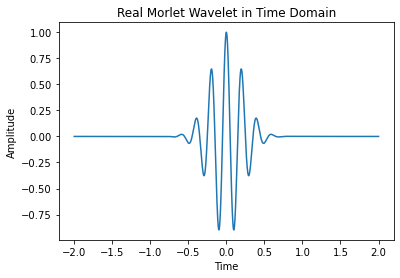

In [55]:
morlet_real = morletReal(time, freq, sigma)

plt.plot(time, morlet_real)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Real Morlet Wavelet in Time Domain')
plt.show()

## The Power Spectrum of the Real Morlet
The power spectrum of the real morlet wavelet created above.

In [56]:
morlet_powerSpec = np.abs(np.fft.fft(morlet_real/time_lenth))**2
freq_rate = np.linspace(0, sr/2, int(time_lenth/2)+1) # the half the sample rate due to the Nyquist rate

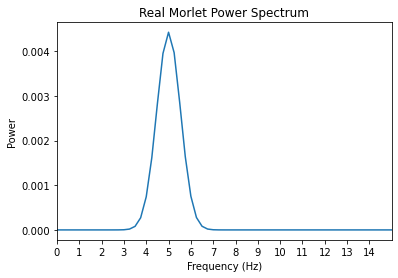

In [57]:
plt.plot(freq_rate, morlet_powerSpec[:len(freq_rate)]) # to freq_rate legnth as to return positive values.
plt.xlim([0,15])
plt.xticks(np.linspace(0,14, 15))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Real Morlet Power Spectrum')
plt.show()

# The Complex Morlet Wavelet

Complex Morlet wavelets contains the imaginary components.

$y= e^{ (i 2\pi f)}\ e^{(\frac{-4 log(2) t^{2}}{ω^2})}$

where i is Square Root of -1.

In [54]:
def morletComplex(time, freq, sigma):
    exp = np.exp(1j *2 * np.pi * freq * time) # 1j is pythons imaginary value equivilant to Sqrt -1
    gaussian = np.exp((-4* np.log(2)*time**2) / (sigma**2))
    morlet =exp* gaussian
    return morlet

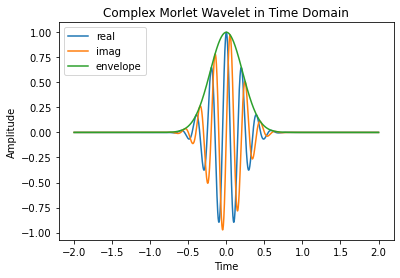

In [60]:
morlet_cmplx = morletComplex(time, freq, sigma)

plt.plot(time, morlet_cmplx.real, label='real')
plt.plot(time, morlet_cmplx.imag, label='imag')
plt.plot(time, np.abs(morlet_cmplx), label='envelope')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Complex Morlet Wavelet in Time Domain')
plt.legend(loc='upper left')
plt.show()